# Assignment 5

In [3]:
!pip install category_encoders


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("C:/Users/Priyanka C/Desktop/Guvi Projects/Task 6/Assignment 5_Car Worth/car_data.csv")

In [6]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [7]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [9]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [10]:
df.corr()

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_5252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


# Task 1
1. Find the linear regression equation for mileage vs price.

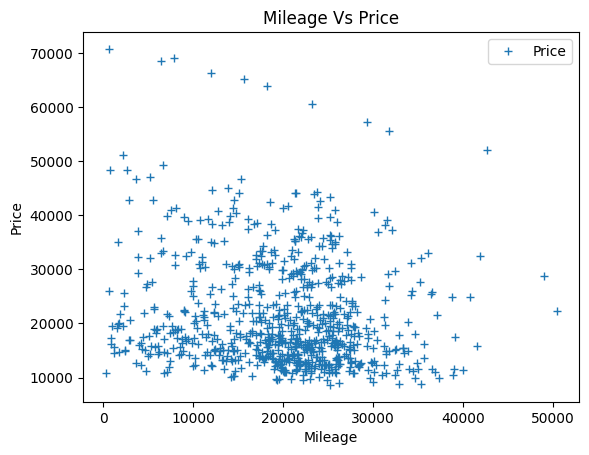

In [11]:
df.plot(x='Mileage', y='Price', style='+')
plt.title('Mileage Vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [12]:
X = df[['Mileage']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)
X_train.shape, X_test.shape

((562, 1), (242, 1))

In [13]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
m = regressor.coef_[0]
c = regressor.intercept_
print(m)
print(c)

-0.17786542463071636
25099.932090095834


In [14]:
## we have the value of the intercept and the coefficient, now we will form the equation
## y = m*x + c
print("Prediction of Price (Y) = {} * Mileage (x) + {}".format(m,c))

Prediction of Price (Y) = -0.17786542463071636 * Mileage (x) + 25099.932090095834


2. Chart the original data and the equation on the chart.


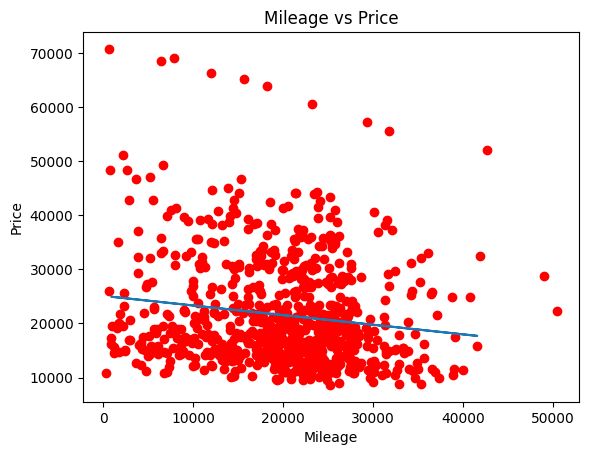

In [15]:
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pred)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [16]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: 0.011465819598535765


0.011465819598535765

# Tasks, Part 2
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [17]:
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)
X_train.shape, X_test.shape

((562, 7), (242, 7))

In [18]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
m1 = regressor.coef_[0]
m2 = regressor.coef_[1]
m3 = regressor.coef_[2]
m4 = regressor.coef_[3]
m5 = regressor.coef_[4]
m6 = regressor.coef_[5]
m7 = regressor.coef_[6]
c = regressor.intercept_
print('m1',m1)
print('m2',m2)
print('m3',m3)
print('m4',m1)
print('m5',m5)
print('m6',m6)
print('m7',m7)
print('c',c)

m1 -0.18063742612698813
m2 3938.6789699073884
m3 -818.9548140556993
m4 -0.18063742612698813
m5 6221.601603529276
m6 -1819.255853608865
m7 3705.8816725253537
c 5566.494682031069


In [19]:
## we have the value of the intercept and the coefficient, now we will form the equation
## y = m*x + c
print("Prediction of Price (Y) = {} * Mileage(x1) + {} * Cylinder(x2) + {} * Liter(x3) + {} * Doors(x4) + {} *  Cruise(x5) + {} *  Sound(x5) + {} *  Leather(x5) + {}". format(m1,m2,m3,m4,m5,m6,m7,c))

Prediction of Price (Y) = -0.18063742612698813 * Mileage(x1) + 3938.6789699073884 * Cylinder(x2) + -818.9548140556993 * Liter(x3) + -1441.5651543768824 * Doors(x4) + 6221.601603529276 *  Cruise(x5) + -1819.255853608865 *  Sound(x5) + 3705.8816725253537 *  Leather(x5) + 5566.494682031069


2. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: 0.388016330616605


0.388016330616605

3. Find the combination of the factors that is the best predictor for price.

In [21]:
df.corr()

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_5252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


### From the above table, it is clear that the correlation factor was quite low with mileage, doors and Sound. Hence, we are considering the rest

In [22]:
X = df[['Cylinder','Liter','Cruise','Leather']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)
X_train.shape, X_test.shape
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: 0.3419289728359025


0.3419289728359025

# Tasks, Hard Mode
1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [23]:
dummy = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
dummy

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.Make.value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [25]:
df.Model.value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [26]:
df.Type.value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250, random_state = 3)

In [28]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
print('Intercept:', regressor.intercept_)
print('Coefficient:',regressor.coef_)
print('Score:', regressor.score(X_test, y_test))

Intercept: -2581.7893910526363
Coefficient: [3213.71553562   42.86096941 6230.81709458 2921.56636173]
Score: 0.45289323267581394


2. Find the best combination of factors to predict price

In [30]:
df.corr()

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_5252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [31]:
X = df[['Cylinder','Liter','Cruise','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3880163306166048


0.3880163306166048

In [32]:
X = df[['Cylinder','Liter','Cruise','Leather','Mileage','Doors']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3762856432862902


0.3762856432862902

In [33]:
X = df[['Cylinder','Liter','Cruise','Leather','Mileage','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.364911226504551


0.364911226504551

In [34]:
X = df[['Cylinder','Liter','Cruise','Leather','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.37418132996244524


0.37418132996244524

In [35]:
X = df[['Cylinder','Liter','Cruise','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3752633573628026


0.3752633573628026

In [36]:
X = df[['Cylinder','Liter','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3158022031879518


0.3158022031879518

In [37]:
X = df[['Cylinder','Cruise','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3875791733231523


0.3875791733231523

In [38]:
X = df[['Liter','Cruise','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.370247196183332


0.370247196183332

In [39]:
X = df[['Cylinder','Cruise','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3875791733231523


0.3875791733231523

In [40]:
X = df[['Cylinder','Cruise','Leather','Mileage','Doors']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.4076108557222541


0.4076108557222541

In [41]:
X = df[['Cylinder','Cruise','Leather','Mileage','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.4078671146056003


0.4078671146056003

In [42]:
X = df[['Cylinder','Cruise','Leather','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.41155835904638827


0.41155835904638827

In [43]:
X = df[['Cylinder','Cruise','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.39628334260793985


0.39628334260793985

In [44]:
X = df[['Cylinder','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3155457929689419


0.3155457929689419

In [45]:
X = df[['Cruise','Leather','Mileage','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.24716371245351643


0.24716371245351643

In [46]:
X = df[['Cylinder','Cruise','Leather','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.41155835904638827


0.41155835904638827

In [47]:
X = df[['Cylinder','Cruise','Leather','Doors']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.39528512677397587


0.39528512677397587

In [48]:
X = df[['Cylinder','Cruise','Leather','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3996776318440405


0.3996776318440405

In [49]:
X = df[['Cylinder','Cruise','Doors','Sound']].values
y = df['Price'].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state = 2)

scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test_scaled,y_test)

R2- SCORE: 0.3783397039980311


0.3783397039980311

## We find that, the features 'Cylinder','Cruise','Leather','Doors','Sound'  make the best combination.
